## Data Cleaning and Preprocessing

In [131]:
# import libraries

import pandas as pd
import numpy as np
# An Imputer is a tool used to handle missing values in datasets.
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
df = pd.read_csv('../data/processed/heart_disease_combined.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,source
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland


In [133]:
# Checking the types of a dataset
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
source       object
dtype: object

The datatypes of a dataset is fine.

In [134]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [135]:
# Checking non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
 14  source    920 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 107.9+ KB


In [136]:
# Total entries are 920
df.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
source        0
dtype: int64

In [137]:
# Take care of "target" label
df['target'].value_counts()

target
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [138]:
# Converting Multi-class into binary classification
df['target'] = df['target'].apply(lambda x:1 if x>0 else 0)
df['target'].value_counts()

target
1    509
0    411
Name: count, dtype: int64

>“The dataset originally contained five disease severity levels (0–4), but for simplicity and clinical interpretability, they were collapsed into a binary classification (0 = no disease, 1 = presence of disease).”


In [139]:
# Check for duplicate values
print('Total duplicated values: ', df.duplicated().sum())

# Locations of duplicated values
dup_indices = df[df.duplicated()].index
print('Index: ', dup_indices)

Total duplicated values:  2
Index:  Index([405, 907], dtype='int64')


In [140]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,source
404,49.0,0.0,2.0,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0,hungarian
405,49.0,0.0,2.0,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0,hungarian
859,58.0,1.0,3.0,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,1,va
907,58.0,1.0,3.0,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,1,va


In [141]:
# Drop duplicated values
df.drop_duplicates(inplace=True)

# Verify that there is no duplicates
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,source


In [142]:
# Dealling with missing values

# Compute Missing value percentages
missing_percent = df.isnull().mean() * 100
print(f'"Missing percentage" \n{missing_percent}')

"Missing percentage" 
age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.427015
chol         3.159041
fbs          9.803922
restecg      0.217865
thalach      5.991285
exang        5.991285
oldpeak      6.753813
slope       33.442266
ca          66.339869
thal        52.723312
target       0.000000
source       0.000000
dtype: float64


In [143]:
# Columns contain missing values
missing_columns = {'trestbps': 'resting blood pressure (in mm Hg on admission to the hospital)',
                   'chol': 'serum cholestoral in mg/dl',
                   'fbs': '(fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)',
                   'restecg': 'resting electrocardiographic results Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes criteria',
                   'thalach' : 'maximum heart rate achieved',
                   'exang' : 'exercise induced angina (1 = yes; 0 = no)',
                   'oldpeak' : 'ST depression induced by exercise relative to rest',
                   'slope' : 'the slope of the peak exercise ST segment Value 1: upsloping Value 2: flat Value 3: downsloping',
                   'ca' : 'number of major vessels (0-3) colored by flourosopy',
                   'thal' : '3 = normal; 6 = fixed defect; 7 = reversable defect'}
missing_columns = pd.DataFrame(data=missing_columns, index=[0])
missing_columns

,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,resting blood pressure (in mm Hg on admission ...,serum cholestoral in mg/dl,(fasting blood sugar > 120 mg/dl) (1 = true; ...,resting electrocardiographic results Value 0: ...,maximum heart rate achieved,exercise induced angina (1 = yes; 0 = no),ST depression induced by exercise relative to ...,the slope of the peak exercise ST segment Valu...,number of major vessels (0-3) colored by flour...,3 = normal; 6 = fixed defect; 7 = reversable d...


In [144]:
# Analyzing each missing columns
missing_columns['trestbps']

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,source
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1,va
916,62.0,1.0,1.0,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,va
917,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,1,va
918,58.0,1.0,4.0,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,va


In [145]:
# Columns contain missing values
missing_columns = ['trestbps',
                   'chol',
                   'fbs',
                   'restecg',
                   'thalach',
                   'exang',
                   'oldpeak',
                   'slope',
                   'ca',
                   'thal']

# Dataframe contain missing values. Used to check numerical or category column
df_missing = df[missing_columns]
df_missing

,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
915,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN
916,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
917,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0
918,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
# Checking whether data is numerical or categorical
df_missing['thal'].value_counts()

thal
3.0    196
7.0    192
6.0     46
Name: count, dtype: int64

### Numerical Columns

* trestbps
* chol
* thalach
* oldpeak

### Categorical Columns

* fbs
* restecg
* exang
* slope
* ca

In [147]:
# Dealing with missing values

# Save the missing value before imputations
missing_before = df.isna().sum()

# Select numeric columns
numerical_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Create the imputer
median_imputer = SimpleImputer(strategy = 'median')

# Fit and transform the numeric columns
df[numerical_columns] = median_imputer.fit_transform(df[numerical_columns])

# Select Categorical Columns
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create an imputer
mode_imputer = SimpleImputer(strategy='most_frequent')

# Fill and transform the categorical column
df[categorical_columns] = mode_imputer.fit_transform(df[categorical_columns])

# Save missing values after imputation
missing_after = df.isna().sum()

In [148]:
# Combine the imputer results
missing_compare = pd.DataFrame(data={'Before Imputation': missing_before,
                                     'After Imputation': missing_after})

# Show only columns that had missing data
missing_compare = missing_compare[missing_compare.sum(axis=1) > 0]
missing_compare

,Before Imputation,After Imputation
trestbps,59,0
chol,29,0
fbs,90,0
restecg,2,0
thalach,55,0
exang,55,0
oldpeak,62,0
slope,307,0
ca,609,0
thal,484,0


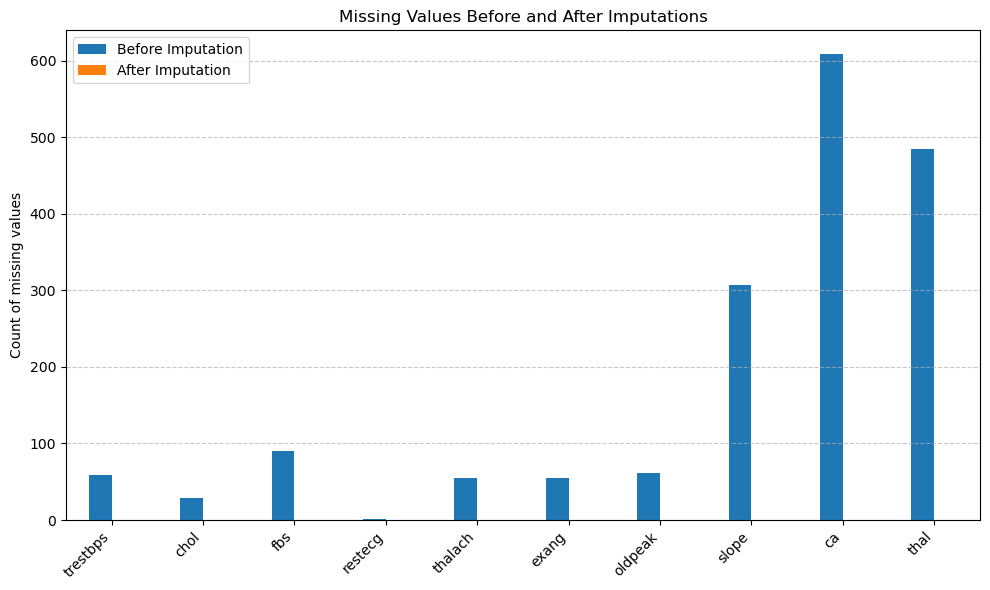

In [149]:
missing_compare.plot(kind='bar', figsize=(10,6))
plt.title('Missing Values Before and After Imputations')
plt.ylabel('Count of missing values')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [151]:
# Drop source column
df.drop(columns='source', inplace=True)

In [152]:
df.to_csv('../data/processed/heart_disease_clean.csv', index=False)

### Summary

Missing data across the dataset was addressed through systematic imputation techniques to ensure data integrity and analytical consistency.
Numerical attributes were imputed using their **median values**, which minimizes the influence of outliers, while categorical variables were filled with their **most frequent (mode)** categories to preserve distributional balance.

The comparison chart demonstrates a complete elimination of missing values post-imputation, confirming the effectiveness of the preprocessing step.
This process ensures that the dataset is now fully prepared for subsequent **Exploratory Data Analysis (EDA)** and modeling phases without introducing bias or information loss.

### Next Step — Exploratory Data Analysis (EDA)

With data cleaning and preprocessing complete, the dataset is now consistent, reliable, and ready for in-depth analysis.
In the next phase, we will perform **Exploratory Data Analysis (EDA)** to better understand data patterns, feature relationships, and potential predictors of heart disease.

This step will include:

* Statistical summaries and distributions of key features.
* Correlation analysis between variables.
* Visual exploration of relationships and patterns.
* Identification of trends that may inform model development.